<a href="https://colab.research.google.com/github/seugminhama/-Univ-data-anaylysis-project/blob/main/%EC%9E%90%EC%A0%84%EA%B1%B0%20%EC%88%98%EC%9A%94%20%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/sampleSubmission.csv')

## 데이터 불러오기

In [ ]:
# Data columns
# datetime - 날짜별로 한 시간 단위
# season -  1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울
# holiday - 공휴일
# workingday - 평일
# weather - 1 : 맑음, 구름 거의 없음
#         - 2 : 흐림, 안개
#         - 3 : 가벼운 눈, 가벼운 비
#         - 4 : 폭우, 뇌우, 폭설
# temp - 온도
# atemp - 체감온도
# humidity - 습도
# windspeed - 풍
# casual - 비회원 수 대여량
# registered - 회원 수 대여량
# count - 전체 대여량

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
submission

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


## EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [ ]:
# train data 결측치 확인
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
# train data 중복치 확인
train.duplicated().sum()

0

In [ ]:
# test data 결측치 확인
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [ ]:
# test data 중복치 확인
test.duplicated().sum()

0

In [ ]:
# datatime 값 쪼개기
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [ ]:
# count 값에서 casual(비회원)과 registered(회원) 대여량 비율 확인
print('Casual의 비율: ', round((train['casual'].sum() / train['count'].sum())*100, 2))
print('Registered의 비율: ', round((train['registered'].sum() / train['count'].sum())*100, 2))

Casual의 비율:  18.8
Registered의 비율:  81.2


In [ ]:
# season의 1, 2, 3, 4는 계절이 아닌 분기를 말함.
train.groupby(['season', 'month'])[['month']].count()

month
season month       
1      1        884
       2        901
       3        901
2      4        909
       5        912
       6        912
3      7        912
       8        912
       9        909
4      10       911
       11       911
       12       912

- 수치형 변수(temp, atemp, humidity, windspeed)와 대여량 간 관계

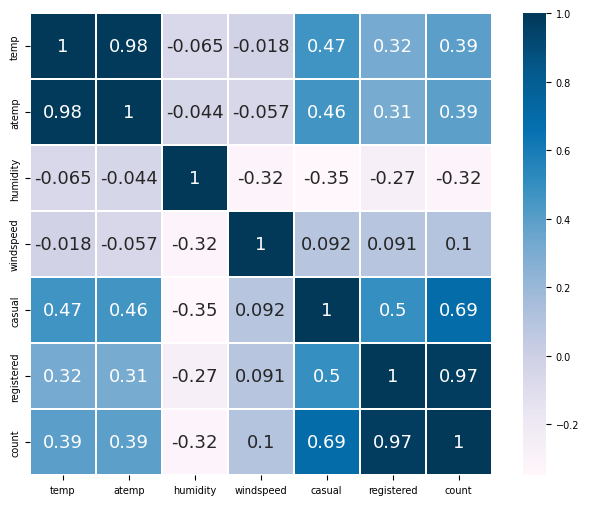

In [ ]:
# 수치형 변수에 대한 heatmap
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 6))
sns.heatmap(train[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(),  linewidths = 0.1, vmax = 1.0 ,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 13})
plt.show()
# 결과 : temp & atepm > windspeed > humidity 순으로 대여량과 연관이 있음.
# registered에 비해 casual이 수치형 변수와 상관성이 더 높게 나타남.

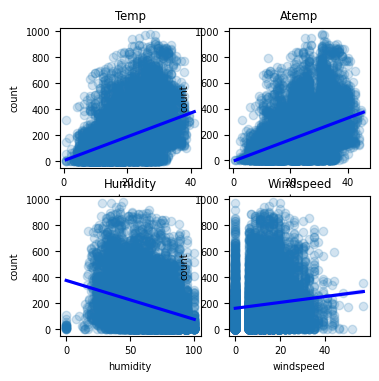

In [ ]:
# 수치형 변수 산점도 확인
plt.rc('font', size = 7)
fig, axs = plt.subplots(2,2, figsize=(4, 4))
ax1, ax2, ax3, ax4 = axs.flatten()

axs1 = sns.regplot(x='temp', y='count', data = train, ax = ax1, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})
axs2 = sns.regplot(x='atemp', y='count', data = train, ax = ax2, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})
axs3 = sns.regplot(x='humidity', y='count', data = train, ax = ax3, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})
axs4 = sns.regplot(x='windspeed', y='count', data = train, ax = ax4, scatter_kws = {'alpha':0.2}, line_kws={'color':'blue'})

axs1.set_title('Temp')
axs2.set_title('Atemp')
axs3.set_title('Humidity')
axs4.set_title('Windspeed')

plt.show()

# 결과 : windspeed의 정비례 관계가 작게 나타나기 때문에 제거 또는 0의 값 보완 필요

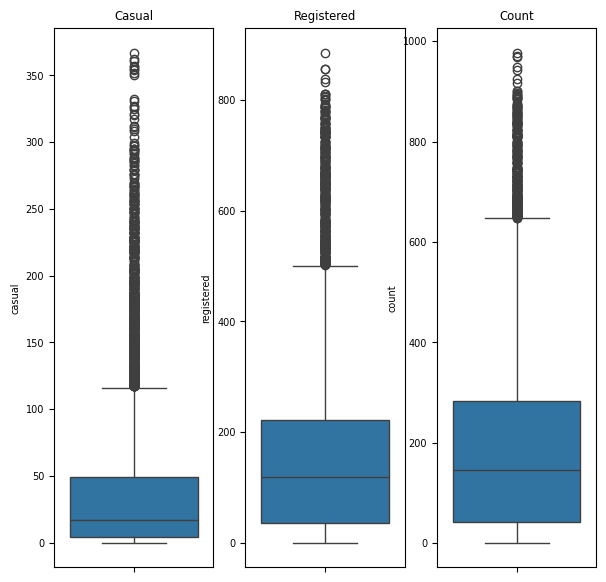

In [ ]:
# count 분포 확인
figure, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (7, 7))

sns.boxplot(y = 'casual', data = train, ax = ax1)
sns.boxplot(y = 'registered', data = train, ax = ax2)
sns.boxplot(y = 'count', data = train, ax = ax3)

ax1.set_title('Casual')
ax2.set_title('Registered')
ax3.set_title('Count')

plt.show()

# 해석 : casual의 분포를 보면 이상치들이 엄청 많고, count의 분포를 보면 시간별 대여량은 150~200 정도에 몰려있음.

- 범주형 변수(year, month, day, hour, weather, season, workingday, holiday)와 대여량 간 관계

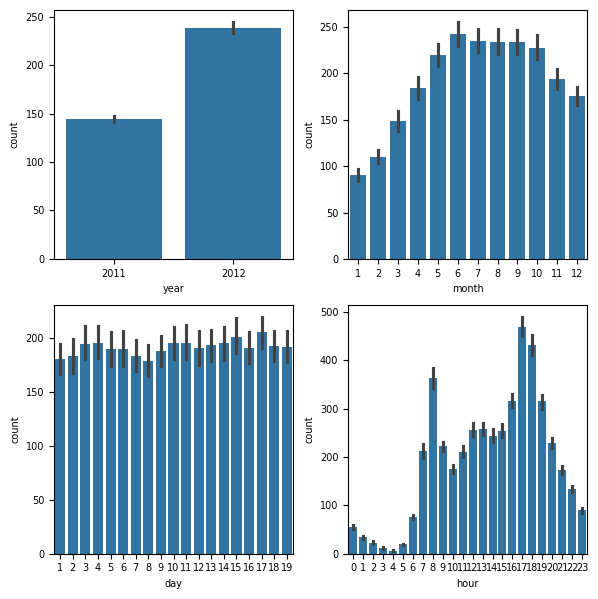

In [ ]:
# year, month, day, hour과 평균 대여량 간 관계
fig, ax = plt.subplots(2,2, figsize=(6,6))
sns.barplot(x='year', y='count', data=train, ax=ax[0,0])
sns.barplot(x='month', y='count', data=train, ax=ax[0,1])
sns.barplot(x='day', y='count', data=train, ax=ax[1,0])
sns.barplot(x='hour', y='count', data=train, ax=ax[1,1])

plt.tight_layout()
plt.show()

# 결과 해석 - year : 2011년에 비해 2012년 평균 대여량 많아짐.
#             month : 6월에 가장 평균 대여량이 높다. 5~10월 모두 높은 편.
#             day : 큰 차이를 보이지 않음 -> 제거
#             hour : 출퇴근 시간인 오전 8시와 오후 5-6시에 평균 대여량이 높음.

In [ ]:
# weather과 평균 대여량 간 관계
(train.groupby('weather')[['datetime']].count() / len(train))*100

,datetime
weather,
1,66.066507
2,26.033437
3,7.890869
4,0.009186


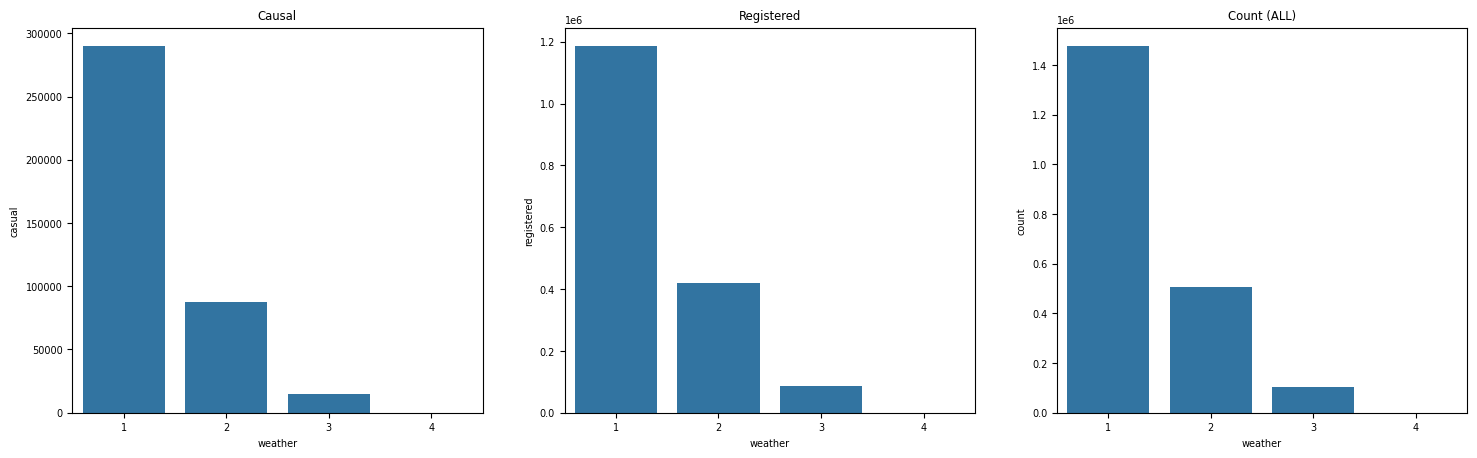

In [ ]:
# y축을 평균이 아닌 합계로 계산한 그래프 (평균으로 하면 weather가 4인 경우가 평균에 맞춰져 실제로는 1개인데 비율이 더 늘어남)
w_train = train.groupby('weather')[['count']].sum().reset_index()
wc_train = train.groupby('weather')[['casual']].sum().reset_index()
wr_train = train.groupby('weather')[['registered']].sum().reset_index()

fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1, ax2, ax3 = axs.flatten()

axs1 = sns.barplot(x='weather', y='casual', data=wc_train, ax = ax1)
axs2 = sns.barplot(x='weather', y='registered', data=wr_train, ax = ax2)
axs3 = sns.barplot(x='weather', y='count', data=w_train, ax = ax3)

axs1.set_title('Causal')
axs2.set_title('Registered')
axs3.set_title('Count (ALL)')

plt.show()

In [ ]:
# train data에서 날씨가 4인 데이터는 1개인데 이는 이상치일 수 있으므로 제거할 필요성이 있어보임.
(train['weather'] == 4).sum()

1

<ipython-input-44-3a0e1accd2e4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs1 = sns.barplot(x='season', y='casual', data=train, ax = ax1, palette = col)
<ipython-input-44-3a0e1accd2e4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs2 = sns.barplot(x='season', y='registered', data=train, ax = ax2,  palette = col)
<ipython-input-44-3a0e1accd2e4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axs3 = sns.barplot(x='season', y='count', data=train, ax = ax3, palette = col)


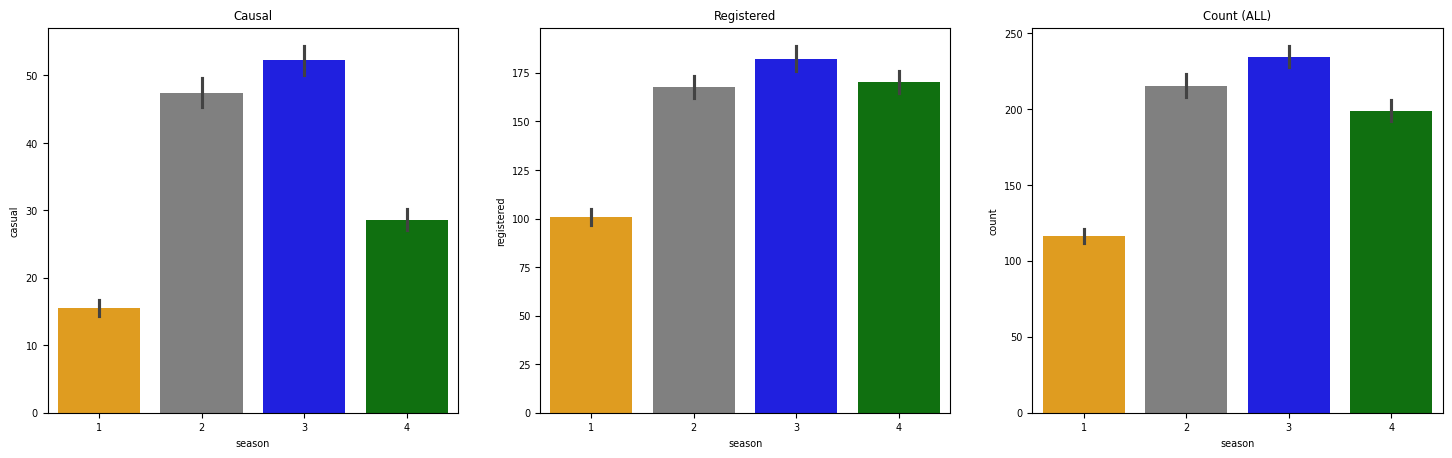

In [ ]:
# season과 평균 대여량 간 관계

fig, axs = plt.subplots(1,3, figsize=(18,5))
ax1, ax2, ax3 = axs.flatten()
col = ['orange', 'grey', 'blue', 'green']

axs1 = sns.barplot(x='season', y='casual', data=train, ax = ax1, palette = col)
axs2 = sns.barplot(x='season', y='registered', data=train, ax = ax2,  palette = col)
axs3 = sns.barplot(x='season', y='count', data=train, ax = ax3, palette = col)

axs1.set_title('Causal')
axs2.set_title('Registered')
axs3.set_title('Count (ALL)')

plt.show()

# 해석: casual보다 registered에서 1, 4분기의 평균 대여량이 높다.(회원의 경우, 비회원보다는 미리 예약하고 탈 가능성이 높다. 이미 예약했으니 춥더라도 타겠다는 의지ㅋ)
#       또한 month 변수와 역할이 겹치기 때문에 season을 남기고 month는 제거(비슷한 변수는 머신러닝 모델에 중복해서 들어가면 오히려 예측 성능이 떨어짐) -> 실제로 month 빼고 학습해 본 결과 오히려 성능이 열화돼서 그냥 넣어주기로 함.

In [ ]:
# workingday 및 holiday와 평균 대여량 간 관계

# 평일(1:0), 주말(0:0), 공휴일(0:1) 3개의 값으로 나눠주기 위해 새로운 열인 'day_type' 생성
train['day_type'] = 'weekend'
is_holi = (train['holiday'] == 1)
is_week = (train['workingday'] == 1)

train.loc[(is_holi), 'day_type'] = 'holiday'
train.loc[(is_week), 'day_type'] = 'workingday'
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,weekend
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,weekend
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,weekend
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,weekend
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,weekend


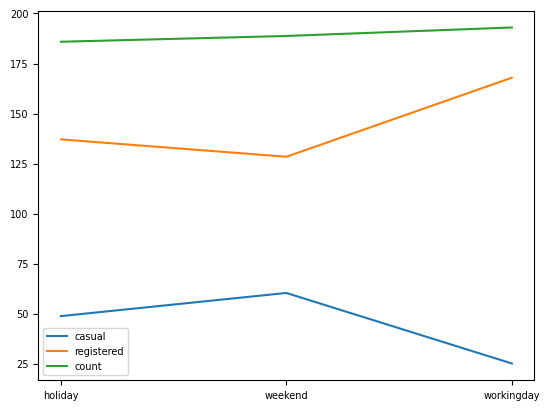

In [ ]:
work_holi = (train.groupby('day_type')[['casual', 'registered', 'count']].sum()/ train.groupby('day_type')[['casual', 'registered', 'count']].count())
# 시각화(그냥 카운트하면 평일의 수가 절대적으로 많으니 날짜 수로 나눔)
plt.plot(work_holi)
plt.legend(work_holi.columns)
plt.show()

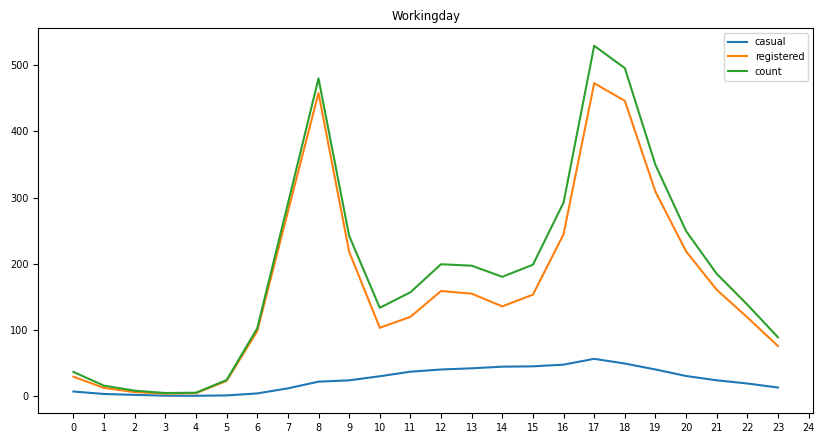

In [ ]:
# 데이터 나누기
h1 = train.loc[train['day_type'] == 'workingday']
h2 = train.loc[train['day_type'] == 'weekend']
h3 = train.loc[train['day_type'] == 'holiday']

# 평일에 대한 시간대별 평균 대여량
h1_df = h1.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h1_df)
plt.xticks(np.arange(0, 25))
plt.legend(h1_df.columns)
plt.title('Workingday')
plt.show()

# 오전 6시부터 증가하기 시작하여 오전 8시에 피크 : 출근
# 오후 4시부터 증가하기 시작하여 오후 5~6시에 피크: 퇴근

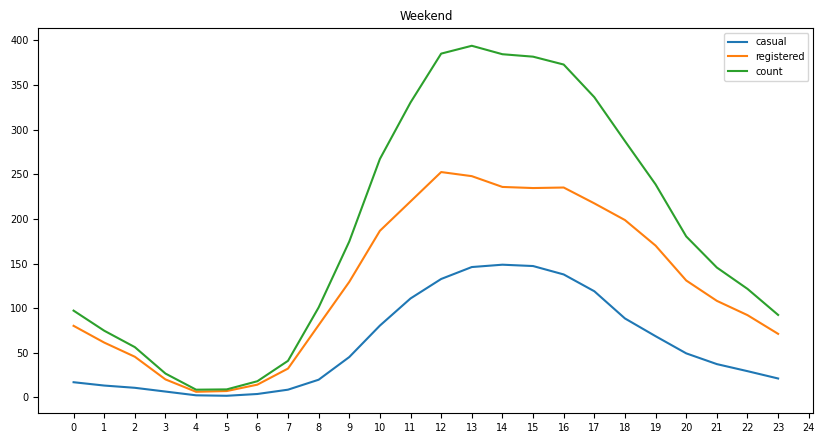

In [ ]:
# 주말에 대한 시간대별 평균 대여량
h2_df = h2.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h2_df)
plt.xticks(np.arange(0, 25))
plt.legend(h2_df.columns)
plt.title('Weekend')
plt.show()

#casual 대여량이 많은 편(낮 시간대 이용이 두드러짐)
#오후 12~4시 피크
#평일 그래프와는 다르게 casual이든 registered든 그래프의 양상 자체는 비슷

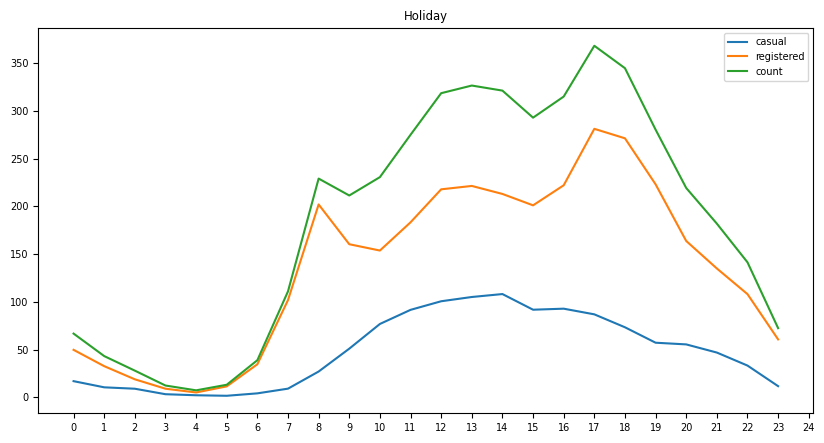

In [ ]:
# 공휴일에 대한 시간대별 평균 대여량
h3_df = h3.groupby('hour')[['casual', 'registered', 'count']].mean()
plt.figure(figsize = (10,5))
plt.plot(h3_df)
plt.xticks(np.arange(0, 25))
plt.legend(h3_df.columns)
plt.title('Holiday')
plt.show()

#casual이 꽤 있음. (registered와 casual에 따라 피크 시간에 차이)

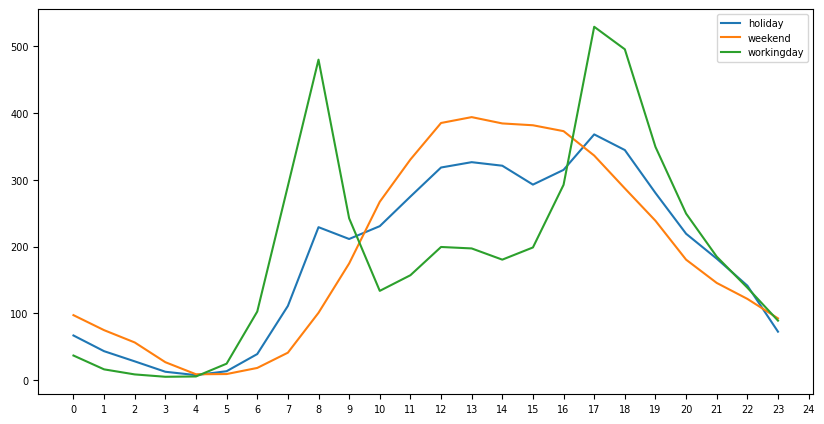

In [ ]:
# 평일 / 주말/ 공휴일에 대한 평균 대여량
h_all  = train.pivot_table(index = 'hour', columns = 'day_type', values = 'count', aggfunc = 'mean')
plt.figure(figsize = (10, 5))
plt.plot(h_all)
plt.legend(h_all.columns)
plt.xticks(np.arange(0, 25))
plt.show()

In [ ]:
# 해석 - 평일 : 출퇴근 시간인 오전 8시 & 오후 5-6시에 완전 몰림
#        주말 : 오후 12-4시 사이가 피크, 공휴일보다 평균 이용 수가 더 많음
#        공휴일 : 주말보다 몰리는 시간대 범위가 더 넓은 편

## 데이터 전처리

In [ ]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,weekend
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,weekend
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,weekend
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,weekend
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,workingday
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,workingday
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,workingday
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,workingday


In [ ]:
# datetime으로부터 요일 추출하기 (dayofweek 활용) 0: 월요일 ~ 6: 일요일
train['dayofweek'] = train['datetime'].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,day_type,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,weekend,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,weekend,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,weekend,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,weekend,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,weekend,5


In [ ]:
train['dayofweek'].value_counts() # 요일별 수는 큰 차이 없음

dayofweek
5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: count, dtype: int64

In [ ]:
# 불필요한 열 삭제
train = train.drop(['datetime', 'day_type', 'day'], axis = 1)
train = train.drop(['casual', 'registered'], axis = 1) # count만 target값으로 보아 casual과 registered는 제거

In [ ]:
# weather이 4인 이상치 제거
print('제거 전 ', len(train))
train = train.loc[train['weather'] !=4]
print('제거 후: ', len(train))

제거 전  10886
제거 후:  10885


In [ ]:
# count의 이상치 제거(3시그마 값을 초과하는 경우 이상치로 간주)
train = train[train['count'] - train['count'].mean() < 3*train['count'].std()]
train.reset_index(inplace =True, drop = True)
print(train.shape)

(10738, 13)


In [ ]:
train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
year            int32
month           int32
hour            int32
dayofweek       int32
dtype: object

In [ ]:
# 범주형 변수를 category type으로 변환 (범주형 변수 인코딩)
cate_name = ['weather', 'season', 'year', 'month', 'hour', 'dayofweek']
for c in cate_name:
    train[c] = train[c].astype('category')
train.dtypes

season        category
holiday          int64
workingday       int64
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
count            int64
year          category
month         category
hour          category
dayofweek     category
dtype: object

In [ ]:
# target 값 로그 변환 (로그 변환을 통해 target 값이 정규분포 형태를 띄게 해줌.)
train['count'] = np.log1p(train['count'])
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2.833213,2011,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,3.713572,2011,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,3.496508,2011,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2.639057,2011,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0.693147,2011,1,4,5


## 모델링

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
X = train.drop(['count'], axis=1)
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# train_test_split을 통해 훈련 데이터인 X_train, y_train과 검증 데이터인 X_test, y_test로 나누어 줌.

In [ ]:
# X_train, X_test의 수치형 변수 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_feature = ['temp', 'atemp', 'humidity', 'windspeed']

X_train_scaled = scaler.fit_transform(X_train[numeric_feature])
X_test_scaled = scaler.transform(X_test[numeric_feature])

# 결과를 데이터프레임으로 변환하여 원래 열 이름 유지
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_feature, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_feature, index=X_test.index)

X_train[numeric_feature] = X_train_scaled_df
X_test[numeric_feature] = X_test_scaled_df

In [ ]:
# 1. LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred_lr = lr.predict(X_test)

In [ ]:
RMSE_lr = mean_squared_error(y_test, pred_lr)**0.5
print(f"LinearRegression RMSE: {RMSE_lr}")

LinearRegression RMSE: 1.0110882202645133


In [ ]:
# 피쳐에 대해 표준화 진행과 k-fold를 함께 함
from sklearn.preprocessing import StandardScaler

lr_reg = LinearRegression()
pipe = make_pipeline(StandardScaler(), lr_reg)
scores = cross_validate(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
print("RMSE: {0:.3f}".format(np.sqrt(np.mean(-scores['test_score']))))

RMSE: 1.018


In [ ]:
# 피쳐에 대해 정규화 진행과 k-fold를 함께 함
lr_reg = LinearRegression()
pipe = make_pipeline(MinMaxScaler(), lr_reg)
scores = cross_validate(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error',return_train_score=True)
print("RMSE: {0:.3f}".format(np.sqrt(np.mean(-scores['test_score']))))

RMSE: 1.018


In [ ]:
# 2. Ridge
from sklearn.preprocessing import RobustScaler

ridge_reg = Ridge()
pipe = make_pipeline(RobustScaler(), ridge_reg)
scores = cross_validate(ridge_reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error',return_train_score=True)
print("RMSE: {0:.3f}".format(np.sqrt(np.mean(-scores['test_score']))))

RMSE: 1.018


In [ ]:
# Ridge 하이퍼 파라미터 튜닝
pipeline = Pipeline([('scaler', RobustScaler()), ('ridge',Ridge())])
params={'ridge__alpha':[5, 10, 15, 20]}
grid_model = GridSearchCV(pipeline, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(X_train, y_train)
print("RMSE: {0:.3f}".format(np.sqrt( -1*grid_model.best_score_)))
print('optimal hyperparameter: ', grid_model.best_params_)

RMSE: 1.018
optimal hyperparameter:  {'ridge__alpha': 20}


In [ ]:
# Ridge 하이퍼 파라미터 튜닝(정규화)
pipeline = Pipeline([('scaler', MinMaxScaler()), ('ridge',Ridge())])
params={'ridge__alpha':[5, 10, 15, 20]}
grid_model = GridSearchCV(pipeline, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_model.fit(X_train, y_train)
print("RMSE: {0:.3f}".format(np.sqrt( -1*grid_model.best_score_)))
print('optimal hyperparameter: ', grid_model.best_params_)

RMSE: 1.018
optimal hyperparameter:  {'ridge__alpha': 5}


In [ ]:
# 3. RandomForest
np.random.seed(0)
rf =  RandomForestRegressor(n_estimators=500)
pipe = make_pipeline(MinMaxScaler(), rf)
scores = cross_validate(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
print("RMSE: {0:.3f}".format(np.sqrt(np.mean(-scores['test_score']))))

RMSE: 0.305


In [ ]:
# 4. LGBM
lgbm = LGBMRegressor(n_estimators = 500, objective = 'regression')
pipe = make_pipeline(MinMaxScaler(), lgbm)
scores = cross_validate(pipe, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
print("MSLE: {0:.3f}".format(np.sqrt(np.mean(-scores['test_score']))))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 267
[LightGBM] [Info] Number of data points in the train set: 6872, number of used features: 12
[LightGBM] [Info] Start training from score 4.587049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 6872, number of used features: 12
[LightGBM] [Info] Start training from score 4.571906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

## 대여량 예측(test data 예측)

In [ ]:
# test data에서 year month, hour, dayofweek 변수 생성
test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [ ]:
# 불필요한 열 삭제
test = test.drop(['datetime'], axis=1)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,4,3


In [ ]:
# 범주형 변수를 category type으로 변환
cate_name = ['weather', 'season', 'year', 'month', 'hour', 'dayofweek']
for c in cate_name:
    test[c] = test[c].astype('category')

test.dtypes

season        category
holiday          int64
workingday       int64
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
year          category
month         category
hour          category
dayofweek     category
dtype: object

In [ ]:
# test의 수치형 변수 정규화
test_scaled = scaler.transform(test[numeric_feature])
test_scaled_df = pd.DataFrame(test_scaled, columns=numeric_feature, index=test.index)
test[numeric_feature] = test_scaled_df

In [ ]:
test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,1,1,0.244898,0.237275,0.56,0.456213,2011,1,0,3
1,1,0,1,1,0.244898,0.288064,0.56,0.000000,2011,1,1,3
2,1,0,1,1,0.244898,0.288064,0.56,0.000000,2011,1,2,3
3,1,0,1,1,0.244898,0.271171,0.56,0.193018,2011,1,3,3
4,1,0,1,1,0.244898,0.271171,0.56,0.193018,2011,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,0.244898,0.271171,0.60,0.193018,2012,12,19,0
6489,1,0,1,2,0.244898,0.271171,0.60,0.193018,2012,12,20,0
6490,1,0,1,1,0.244898,0.271171,0.60,0.193018,2012,12,21,0
6491,1,0,1,1,0.244898,0.288064,0.56,0.157870,2012,12,22,0


In [ ]:
# 가장 성능이 좋았던 모델인 lgbm으로 test target 예측
lgbm.fit(X_train, y_train)
predicted_targets = lgbm.predict(test)
fpred_t = np.expm1(predicted_targets) # 로그 변환 값을 풀어줌

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 8590, number of used features: 12
[LightGBM] [Info] Start training from score 4.576441


In [ ]:
test['count'] = fpred_t
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek,count
0,1,0,1,1,0.244898,0.237275,0.56,0.456213,2011,1,0,3,10.478271
1,1,0,1,1,0.244898,0.288064,0.56,0.000000,2011,1,1,3,4.062107
2,1,0,1,1,0.244898,0.288064,0.56,0.000000,2011,1,2,3,2.483501
3,1,0,1,1,0.244898,0.271171,0.56,0.193018,2011,1,3,3,2.208751
4,1,0,1,1,0.244898,0.271171,0.56,0.193018,2011,1,4,3,1.713595


In [ ]:
# submission data에 count값 넣기
del submission['count']
submission['count'] = test['count']
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.478271
1,2011-01-20 01:00:00,4.062107
2,2011-01-20 02:00:00,2.483501
3,2011-01-20 03:00:00,2.208751
4,2011-01-20 04:00:00,1.713595
